<a href="https://colab.research.google.com/github/ImmarGaneru/PCVK_Ganjil_2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Face detection pada /Images/facedet

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import requests
from io import BytesIO
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def face_detection(image):
  cascade_wajah = cv2.CascadeClassifier(path + 'haarcascades/haarcascade_frontalface_alt.xml')
  gambar = cv2.imread(image)
  gambar_copy = gambar.copy()
  wajah = cascade_wajah.detectMultiScale(gambar_copy)
  for (x,y,w,h) in wajah:
    cv2.rectangle(gambar_copy, (x,y), (x+w, y+h), (0,255,0), 2)
  plt.figure(figsize=(10,10))
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  gambar_copy = cv2.cvtColor(gambar_copy, cv2.COLOR_BGR2RGB)
  plt.subplot(1,2,1)
  plt.imshow(gambar)
  plt.subplot(1,2,2)
  plt.imshow(gambar_copy)
  plt.show()

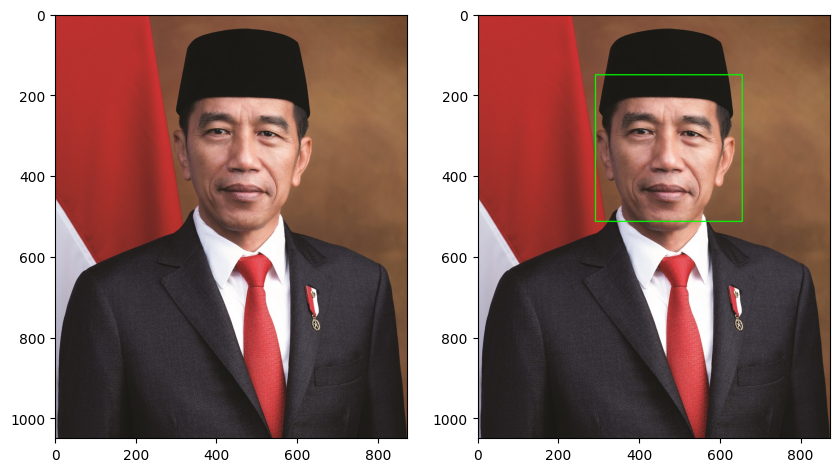

In [13]:
jokowi = path + 'facedet/jokowi.jpg'
face_detection(jokowi)

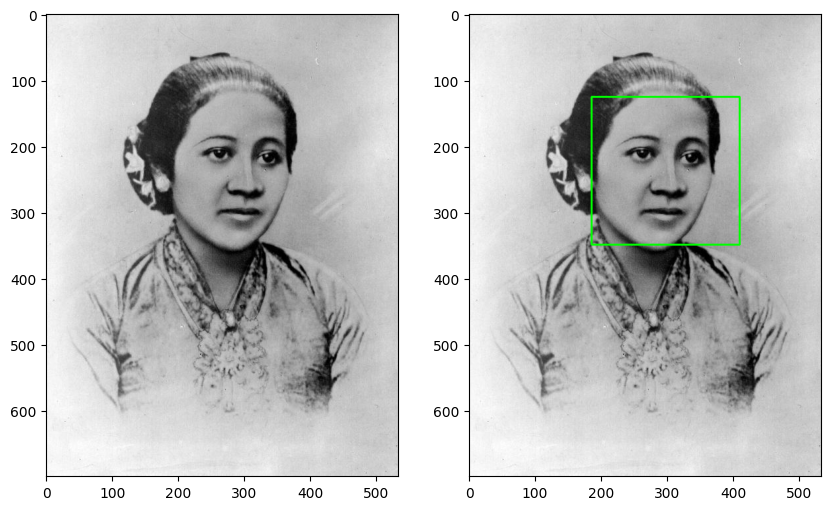

In [14]:
kartini = path + 'facedet/kartini.jpg'
face_detection(kartini)

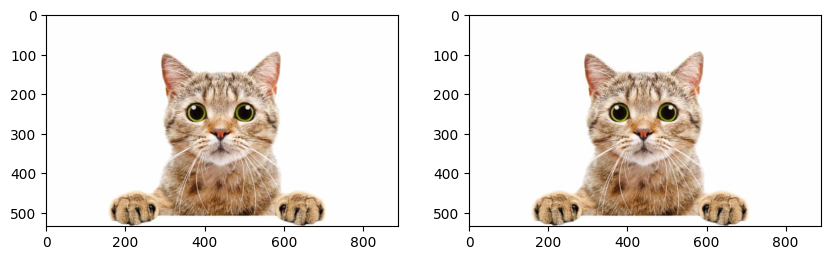

In [15]:
kucing = path + 'facedet/kucing.jpg'
face_detection(kucing)

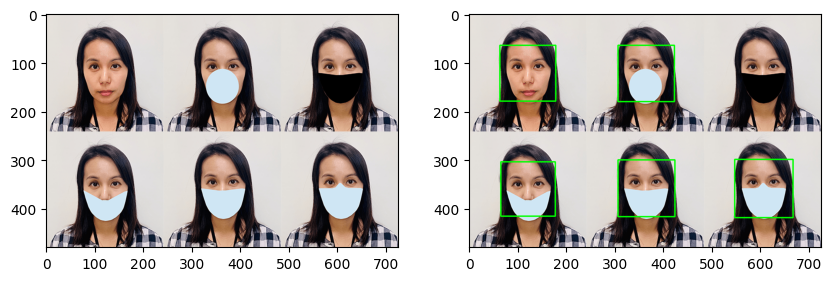

In [17]:
mask = path + 'facedet/mask.png'
face_detection(mask)

##Cat detection

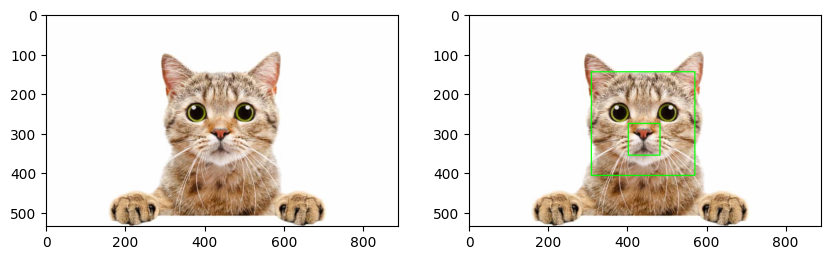

In [18]:
def cat_detection(image):
  cascade_wajah = cv2.CascadeClassifier(path + 'haarcascades/haarcascade_frontalcatface.xml')
  gambar = cv2.imread(image)
  gambar_copy = gambar.copy()
  wajah = cascade_wajah.detectMultiScale(gambar_copy)
  for (x,y,w,h) in wajah:
    cv2.rectangle(gambar_copy, (x,y), (x+w, y+h), (0,255,0), 2)
  plt.figure(figsize=(10,10))
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  gambar_copy = cv2.cvtColor(gambar_copy, cv2.COLOR_BGR2RGB)
  plt.subplot(1,2,1)
  plt.imshow(gambar)
  plt.subplot(1,2,2)
  plt.imshow(gambar_copy)
  plt.show()

cat_detection(kucing)

##Eyes detection

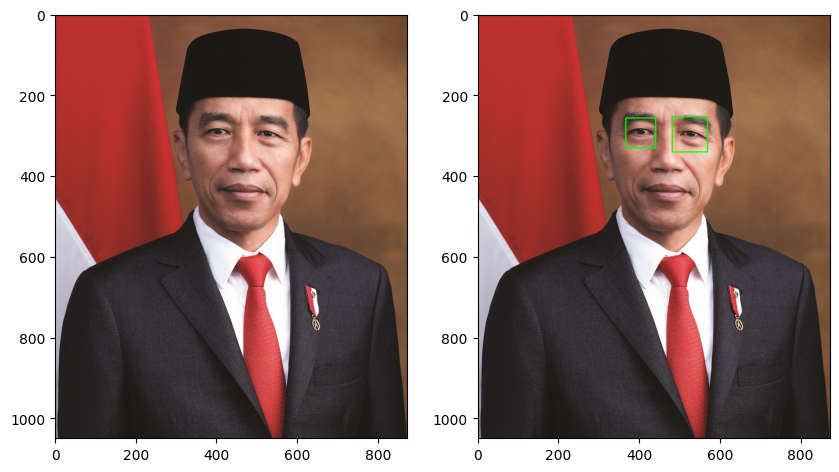

In [19]:
def eye_detection(image):
  cascade_wajah = cv2.CascadeClassifier(path + 'haarcascades/haarcascade_eye.xml')
  gambar = cv2.imread(image)
  gambar_copy = gambar.copy()
  wajah = cascade_wajah.detectMultiScale(gambar_copy)
  for (x,y,w,h) in wajah:
    cv2.rectangle(gambar_copy, (x,y), (x+w, y+h), (0,255,0), 2)
  plt.figure(figsize=(10,10))
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  gambar_copy = cv2.cvtColor(gambar_copy, cv2.COLOR_BGR2RGB)
  plt.subplot(1,2,1)
  plt.imshow(gambar)
  plt.subplot(1,2,2)
  plt.imshow(gambar_copy)
  plt.show()

eye_detection(jokowi)

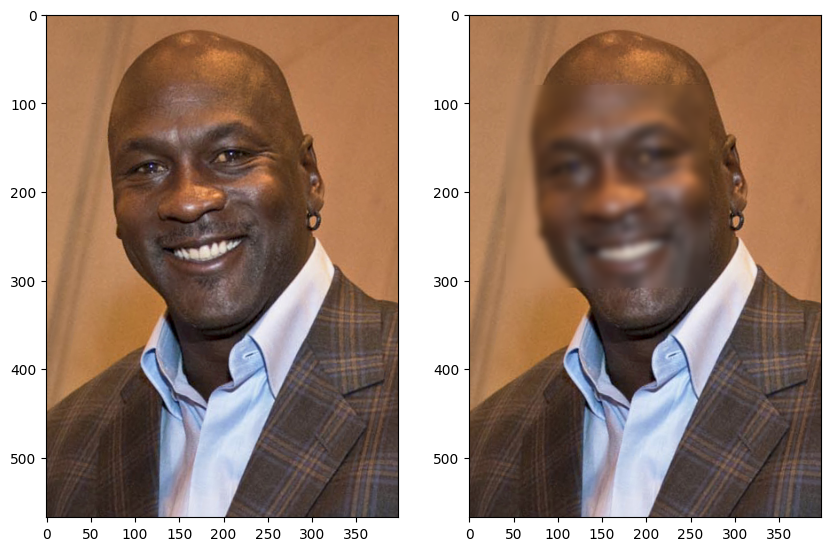

In [20]:
def face_detection_blur(image):
  cascade_wajah = cv2.CascadeClassifier(path + 'haarcascades/haarcascade_frontalface_alt.xml')
  gambar = cv2.imread(image)
  gambar_copy = gambar.copy()
  wajah = cascade_wajah.detectMultiScale(gambar_copy)
  for (x,y,w,h) in wajah:
    face_roi = gambar_copy[y:y+h, x:x+w]
    face_blur = cv2.GaussianBlur(face_roi, (25,25), 4)
    gambar_copy[y:y+h, x:x+w] = face_blur
  plt.figure(figsize=(10,10))
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  gambar_copy = cv2.cvtColor(gambar_copy, cv2.COLOR_BGR2RGB)
  plt.subplot(1,2,1)
  plt.imshow(gambar)
  plt.subplot(1,2,2)
  plt.imshow(gambar_copy)
  plt.show()

mjordan = path + 'facedet/mjordan.jpg'
face_detection_blur(mjordan)

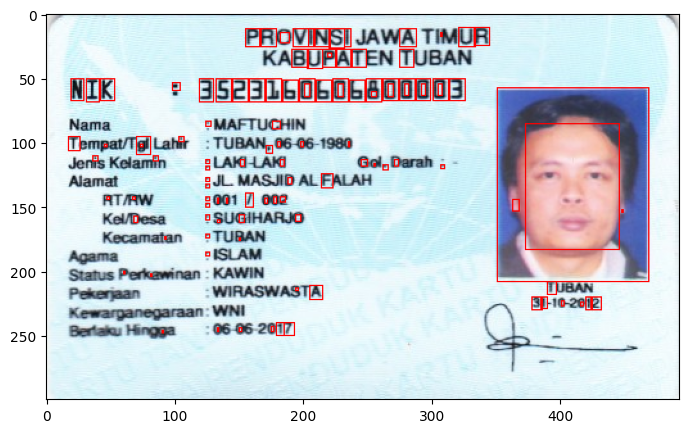

In [21]:
from google.colab.patches import cv2_imshow

path_plate = path + "KTP_More/KTP_More/ktp3.png"
image = cv2.imread(path_plate)

blurred = cv2.GaussianBlur(image, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

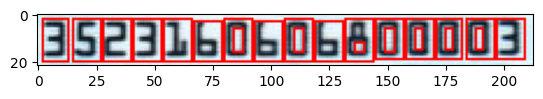

In [30]:
ktp_crop = image[48:70, 117:330]
plt.imshow(cv2.cvtColor(ktp_crop, cv2.COLOR_BGR2RGB))

In [36]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "/content/drive/MyDrive/Digits/"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 1/1 [00:00<00:00,  2.55it/s]
